In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa import seasonal
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
data = pd.read_csv('data\\airline.csv', index_col='Date', parse_dates=['Date'])

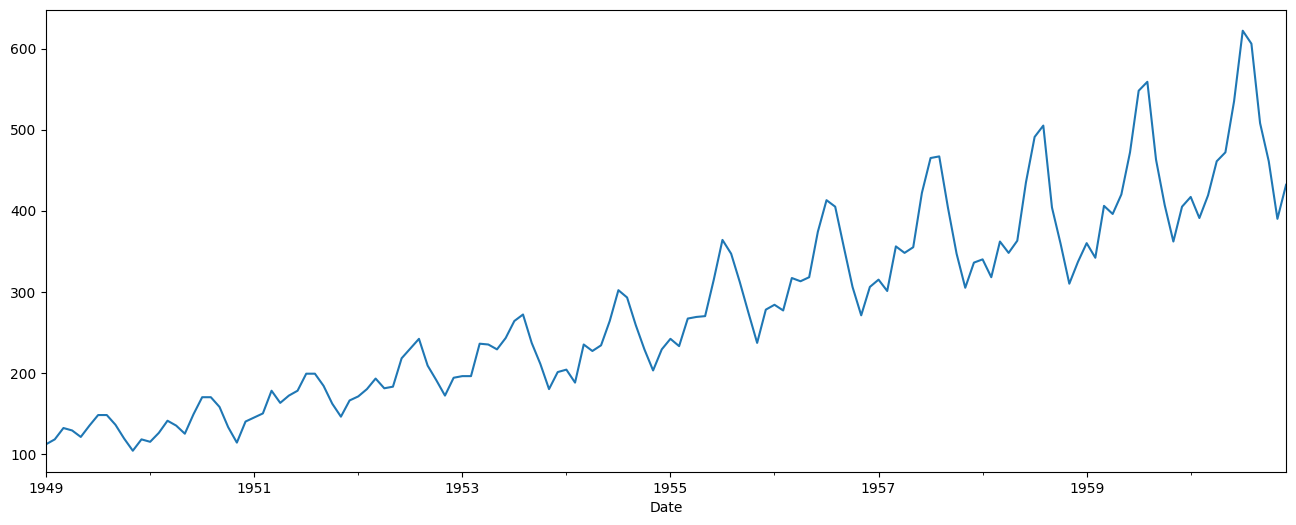

In [3]:
data.passengers.plot(figsize=(16,6))
plt.show()

In [4]:
x_train, x_test = data['passengers'][:-25], data['passengers'][-25:]

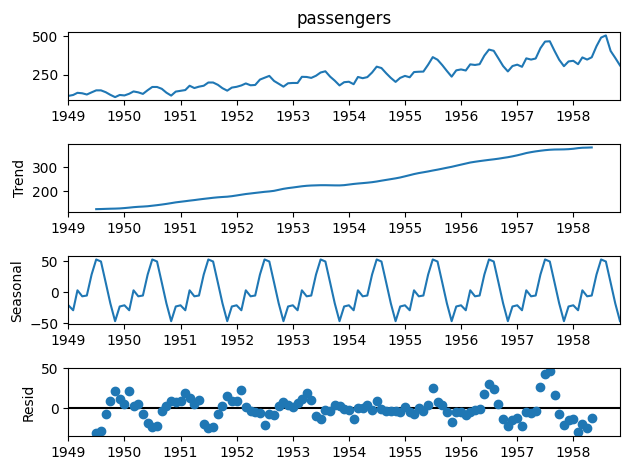

In [5]:
season = seasonal.seasonal_decompose(x=x_train, model='additive')
season.plot()
plt.show()

In [8]:
es = ExponentialSmoothing(x_train, seasonal='add', seasonal_periods=12)
model = es.fit(use_boxcox=True, optimized=True)

c:\Users\yandiher\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ValueError: use_boxcox was set at model initialization and cannot be changed

In [ ]:
pred = model.predict(len(x_train)-10, len(x_train)+50)

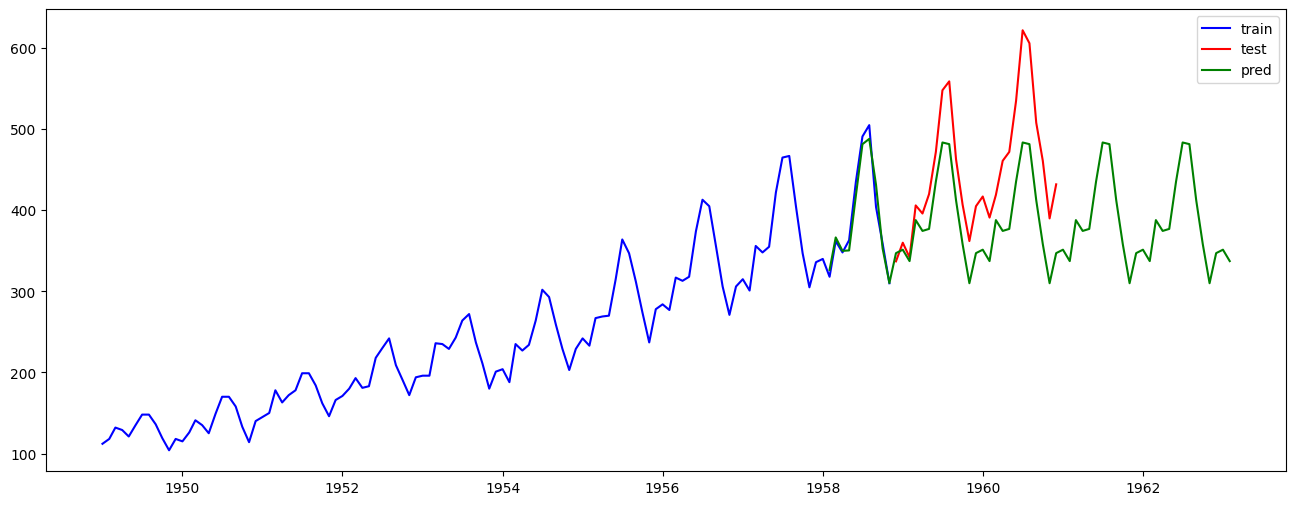

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(x_train, 'b-', label="train")
plt.plot(x_test, 'r-', label="test")
plt.plot(pred, 'g-', label="pred")
plt.legend()
plt.show()